In [1]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:85% !important; }</style>"))
%config IPCompleter.use_jedi=False

In [58]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns

In [140]:
%notebook inline

In [5]:
ds = load_dataset('cakiki/humaneval-codeparrot-small-eval', split='train')

Using custom data configuration cakiki--humaneval-codeparrot-small-eval-9755818be8af2d7a
Reusing dataset parquet (/tf/data/cache/HF/datasets/cakiki___parquet/cakiki--humaneval-codeparrot-small-eval-9755818be8af2d7a/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


In [6]:
df = ds.to_pandas()

In [20]:
df = df[['task_id','temperature', 'top_k', 'top_p', 'typical_p', 'do_sample',
    'num_beams', 'num_beam_groups',  'num_return_sequences', 'codebert-bert-score-prec', 
    'codebert-bert-score-recall','codebert-bert-score-f1', 'edit_distance']].copy()

In [18]:
df['num_tokens_to_generate'].unique()

array([128])

In [73]:
df['f1-mean'] = df['codebert-bert-score-f1'].apply(np.mean)
df['recall-mean'] = df['codebert-bert-score-recall'].apply(np.mean)
df['prec-mean'] = df['codebert-bert-score-prec'].apply(np.mean)
df['edit-mean'] = df['edit_distance'].apply(np.mean)

df['f1-max'] = df['codebert-bert-score-f1'].apply(np.max)
df['recall-max'] = df['codebert-bert-score-recall'].apply(np.max)
df['prec-max'] = df['codebert-bert-score-prec'].apply(np.max)
df['edit-max'] = df['edit_distance'].apply(np.max)

In [87]:
df

,task_id,temperature,top_k,top_p,typical_p,do_sample,num_beams,num_beam_groups,num_return_sequences,codebert-bert-score-prec,...,codebert-bert-score-f1,edit_distance,f1-mean,recall-mean,prec-mean,f1-max,recall-max,prec-max,edit-mean,edit-max
0,HumanEval/2,1.4,50,1.0,0.1,True,1,1,200,"[0.760907769203186, 0.7050846815109253, 0.7610...",...,"[0.7819811105728149, 0.7523476481437683, 0.781...","[0.008456659619450317, 0.006472491909385114, 0...",0.793894,0.809912,0.778956,0.823163,0.833923,0.833034,0.042905,0.247619
1,HumanEval/7,1.4,50,1.0,0.1,True,1,1,200,"[0.8089243173599243, 0.7974163293838501, 0.781...",...,"[0.7883837819099426, 0.7913891077041626, 0.793...","[0.26666666666666666, 0.006622516556291391, 0....",0.798880,0.788742,0.809633,0.816728,0.810078,0.841410,0.122907,0.406780
2,HumanEval/15,1.4,50,1.0,0.1,True,1,1,200,"[0.7830531597137451, 0.7653099298477173, 0.778...",...,"[0.7812178730964661, 0.7814212441444397, 0.778...","[0.12087912087912088, 0.08695652173913043, 0.2...",0.807109,0.841071,0.776407,0.882205,0.916062,0.855435,0.087923,0.533333
3,HumanEval/16,1.4,50,1.0,0.1,True,1,1,200,"[0.7902371287345886, 0.7685325741767883, 0.792...",...,"[0.8312939405441284, 0.8096265196800232, 0.832...","[0.03854389721627409, 0.04395604395604396, 0.0...",0.832846,0.874442,0.795372,0.874251,0.918679,0.853438,0.068864,0.482759
4,HumanEval/22,1.4,50,1.0,0.1,True,1,1,200,"[0.7488330006599426, 0.8264870643615723, 0.815...",...,"[0.7860041260719299, 0.8256152272224426, 0.799...","[0.04173913043478261, 0.37681159420289856, 0.2...",0.802204,0.810558,0.795321,0.859934,0.922050,0.837397,0.144198,0.391304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,HumanEval/138,5.0,50,1.0,1.0,False,100,1,100,"[0.757797122001648, 0.7579367160797119, 0.0, 0...",...,"[0.7782489061355591, 0.7773157954216003, 0.0, ...","[0.0076045627376425855, 0.00804289544235925, 0...",0.094157,0.097151,0.091347,0.792005,0.821561,0.764503,0.000917,0.010050
7026,HumanEval/151,5.0,50,1.0,1.0,False,100,1,100,"[0.7852988243103027, 0.7811688184738159, 0.783...",...,"[0.8016039729118347, 0.799616277217865, 0.8006...","[0.010178117048346057, 0.009828009828009828, 0...",0.800249,0.822162,0.779606,0.805711,0.845408,0.792956,0.011218,0.022075
7027,HumanEval/152,5.0,50,1.0,1.0,False,100,1,100,"[0.7631147503852844, 0.7699211835861206, 0.759...",...,"[0.7763023972511292, 0.7873415350914001, 0.780...","[0.011029411764705883, 0.015706806282722512, 0...",0.555488,0.568841,0.542776,0.792316,0.812645,0.777676,0.012952,0.029412
7028,HumanEval/157,5.0,50,1.0,1.0,False,100,1,100,"[0.0, 0.766814112663269, 0.0, 0.0, 0.776633024...",...,"[0.0, 0.7853899002075195, 0.0, 0.0, 0.80813479...","[0.0, 0.021314387211367674, 0.0, 0.0, 0.063205...",0.015935,0.016472,0.015434,0.808135,0.842300,0.776633,0.000845,0.063205


<IPython.core.display.Javascript object>


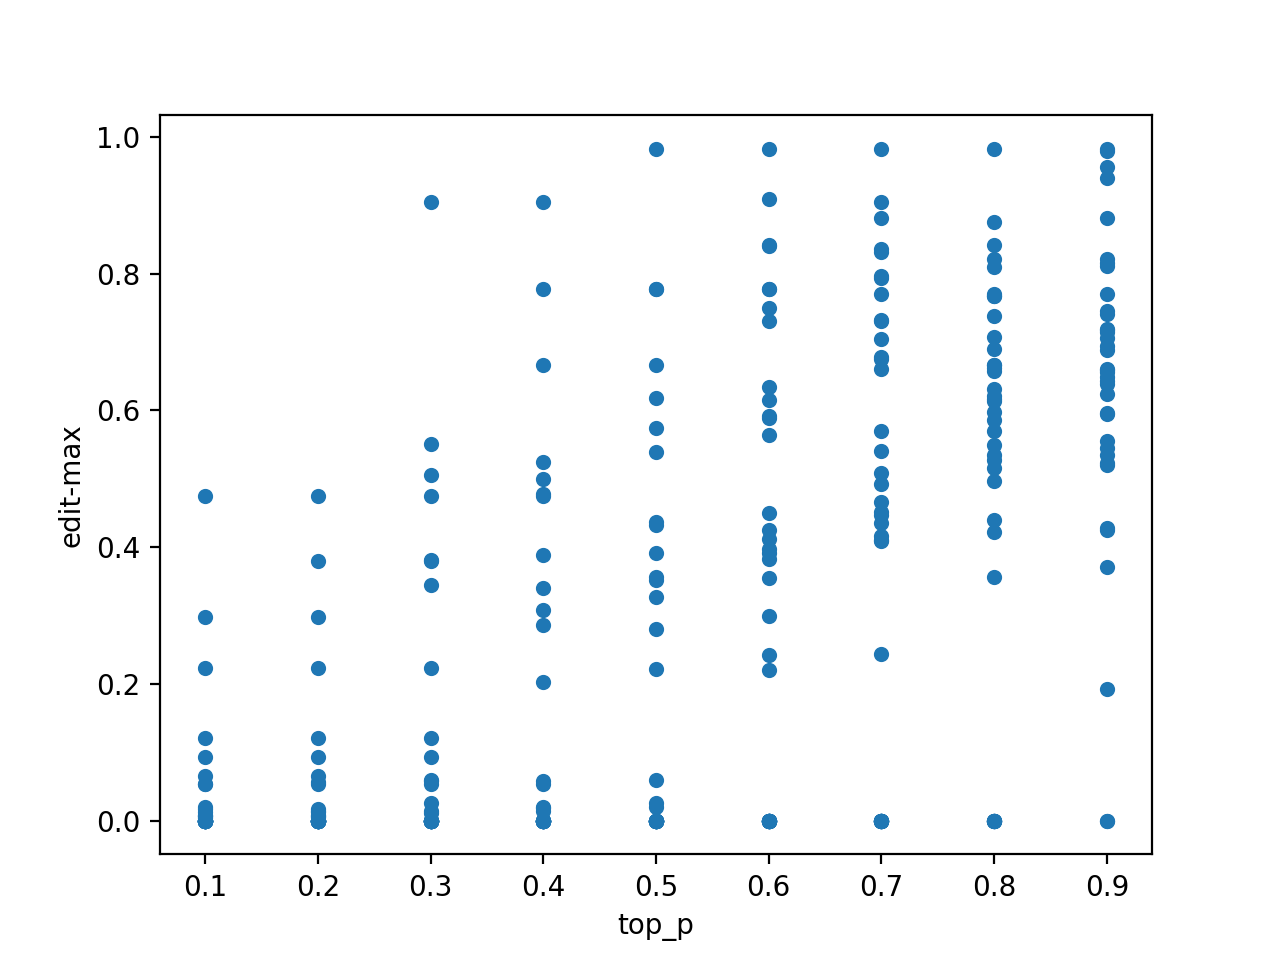

<AxesSubplot:xlabel='top_p', ylabel='edit-max'>

In [136]:
a = df[(df['temperature']==0.8)&df['do_sample']==True].copy()
a[a['typical_p']==1.0].plot(x='top_p', y='edit-max', kind='scatter')

<IPython.core.display.Javascript object>


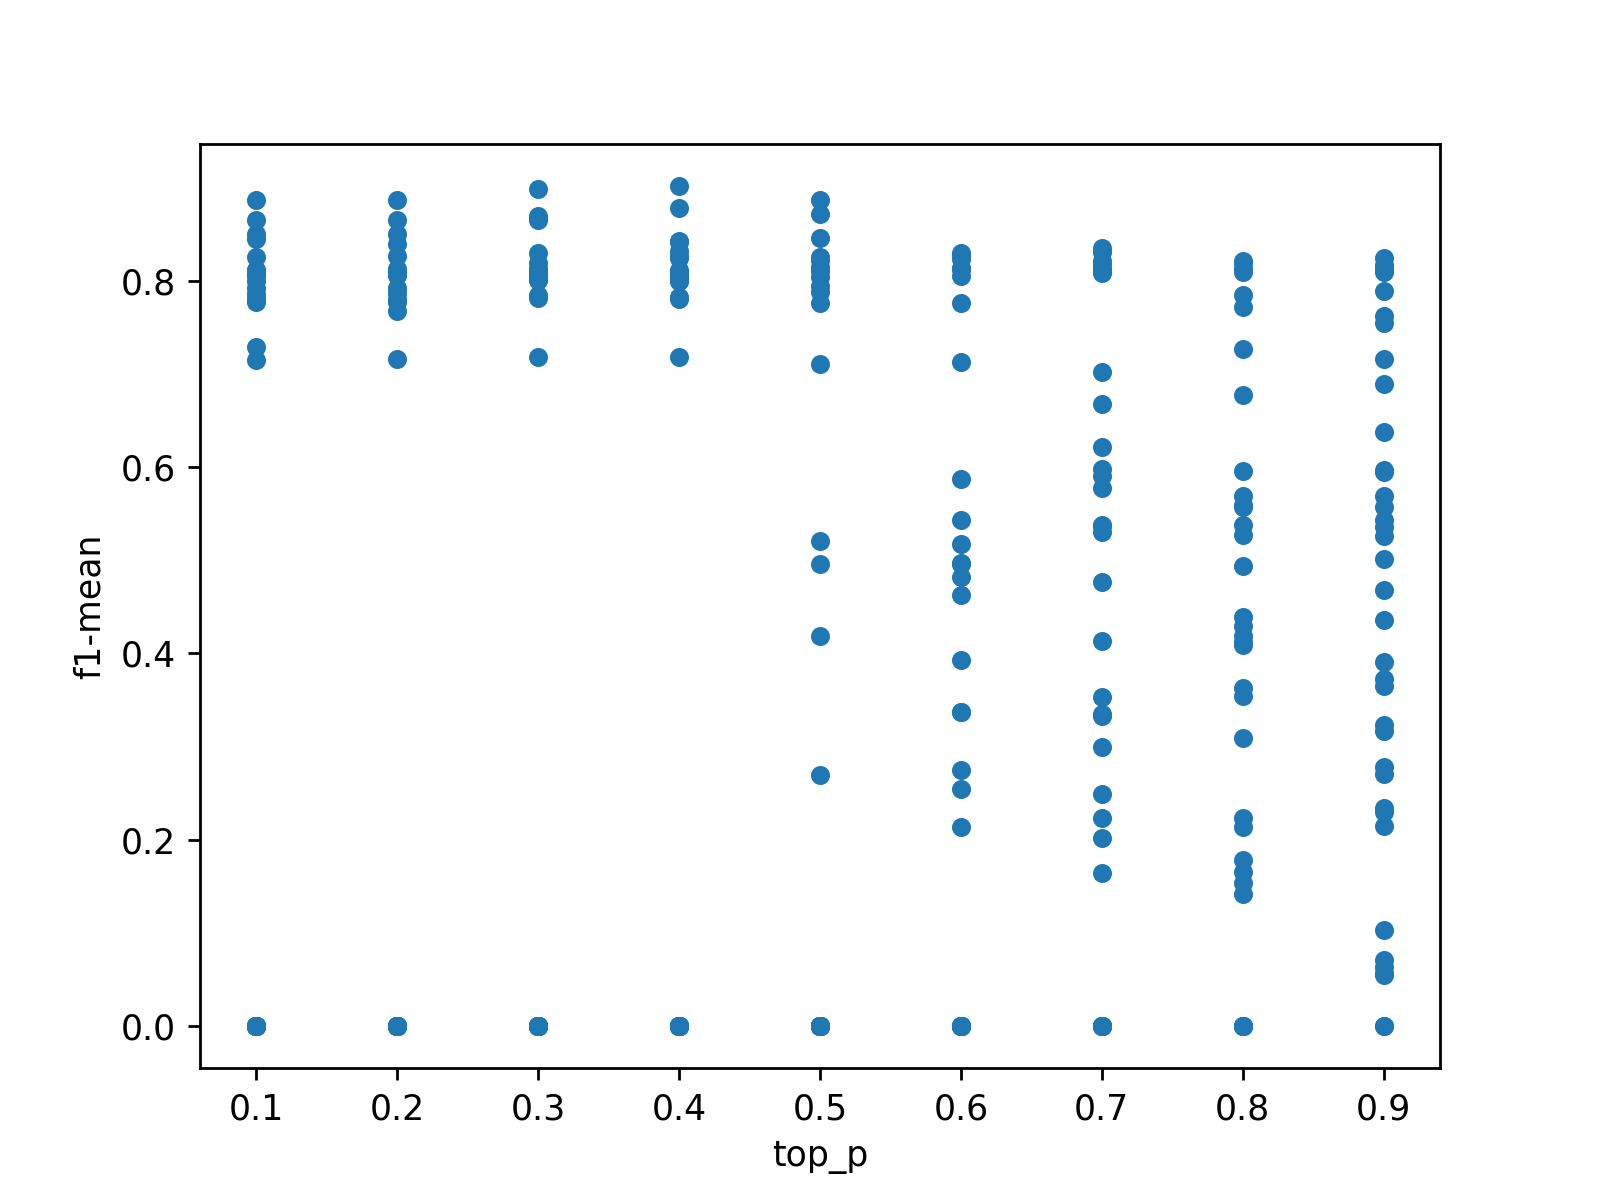

<AxesSubplot:xlabel='top_p', ylabel='f1-mean'>

In [148]:
a = df[(df['temperature']==0.8)&df['do_sample']==True].copy()
a[a['typical_p']==1.0].plot(x='top_p', y='f1-mean', kind='scatter')

In [145]:
from bert_score import plot_example, score

In [143]:
from difflib import SequenceMatcher

In [144]:
SequenceMatcher(None, "def sum(i,j): return i+j", "def add(a,b):\nreturn a+b").ratio()

0.6666666666666666

In [147]:
score(["def sum(i,j): return i+j"], ["def add(a,b):\nreturn a+b"], model_type="microsoft/codebert-base", 
                                  num_layers=12,
                                  use_fast_tokenizer=True)

(tensor([0.9365]), tensor([0.9288]), tensor([0.9327]))

<IPython.core.display.Javascript object>


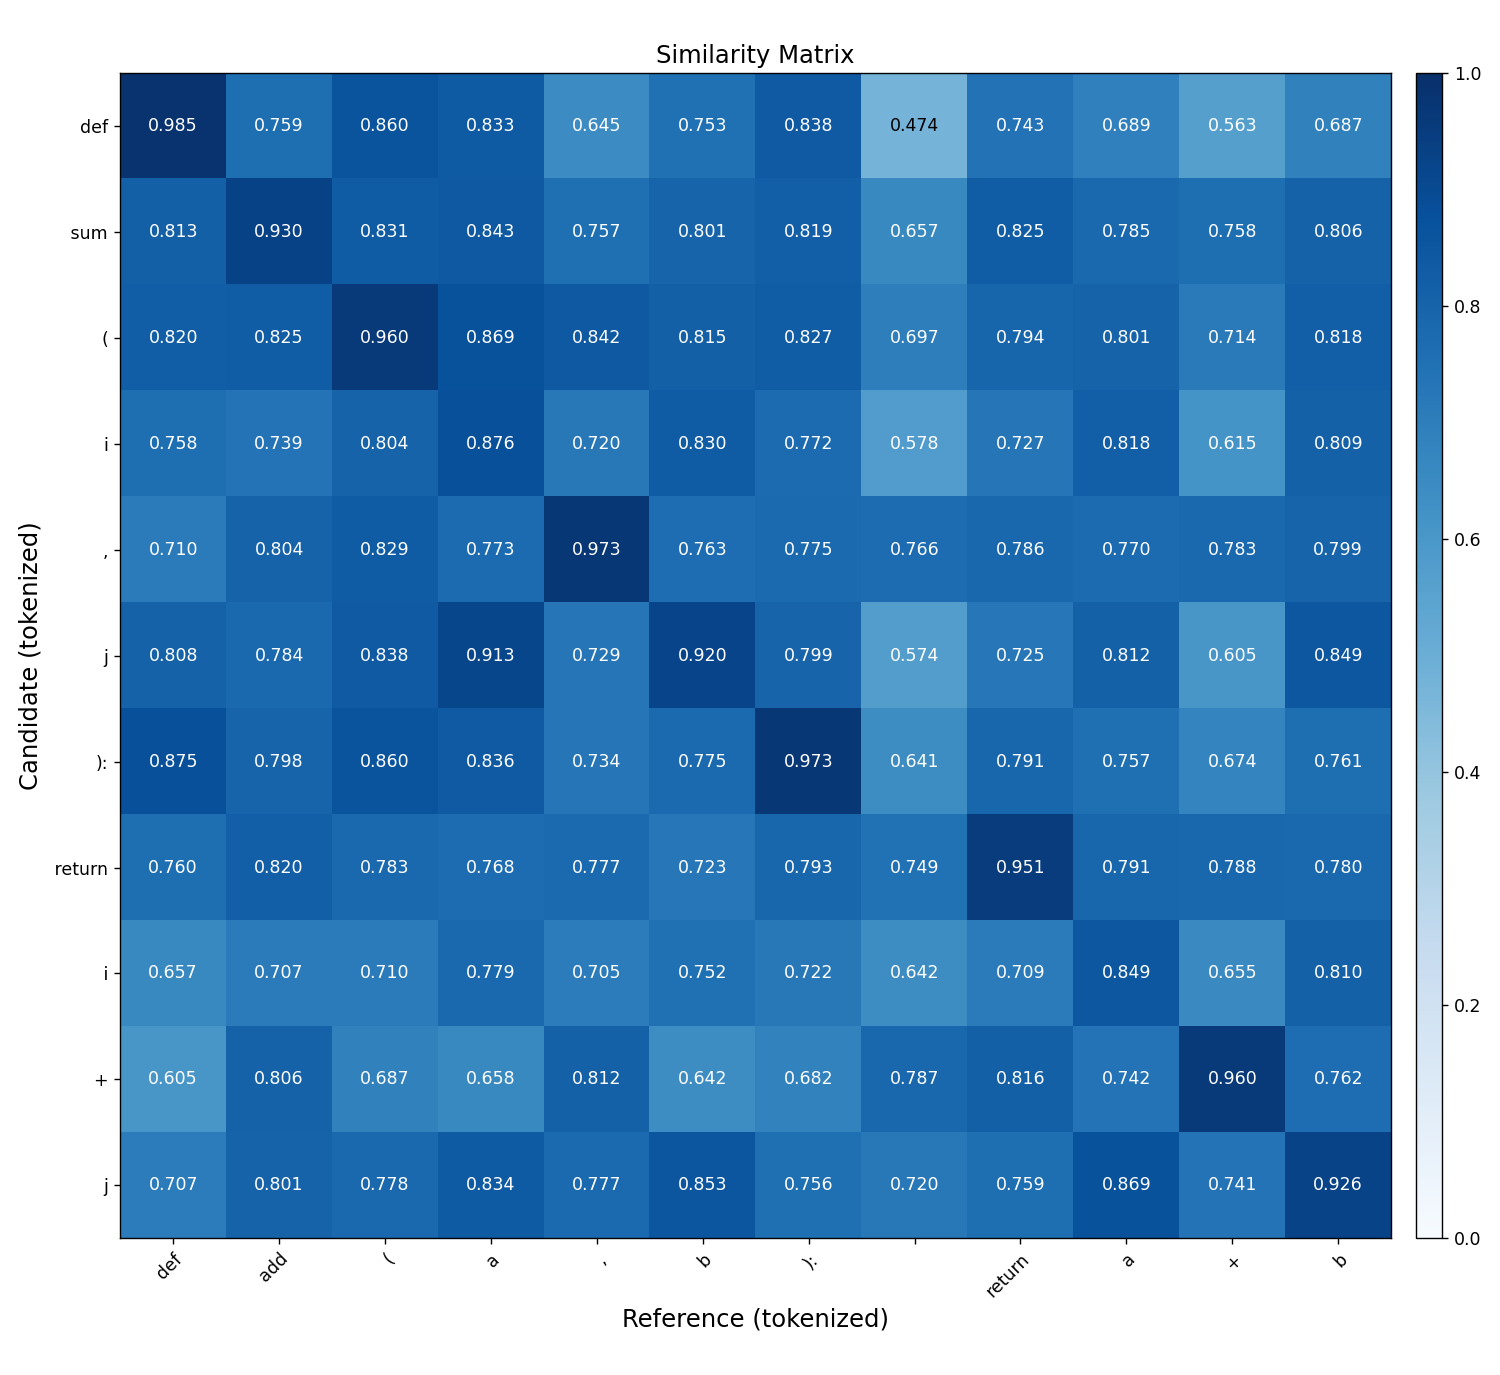

In [142]:
plot_example("def sum(i,j): return i+j", "def add(a,b):\nreturn a+b", model_type="microsoft/codebert-base", 
                                  num_layers=12,
                                  use_fast_tokenizer=True)

In [130]:
a = df[(df['num_beams']==1)&df['do_sample']==False].copy()
# a.plot(x='temperature', y='f1-mean', kind='scatter')
# a[a['typical_p']==1.0].plot(x='top_p', y='f1-mean', kind='scatter')

In [134]:
a.groupby('temperature')['f1-mean'].sum()

temperature
0.1    30.119158
0.2    30.119158
0.3    30.119157
0.4    30.119158
0.5    30.119157
0.6    30.119157
0.7    30.119157
0.8    30.119158
0.9    30.119158
1.0    30.119158
1.1    30.119158
1.2    30.119158
1.3    30.119158
1.4    30.119158
1.5    30.119158
1.6    30.119158
1.7    30.119158
1.8    30.119158
1.9    30.119158
2.0    30.119158
2.1    30.119158
2.2    30.119158
2.3    30.119158
2.4    30.119158
2.5    30.119158
2.6    30.119158
2.7    30.119158
2.8    30.119158
2.9    30.119158
3.0    30.119158
3.1    30.119158
3.2    30.119158
3.3    30.119158
3.4    30.119158
3.5    30.119158
3.6    30.119158
3.7    30.119158
3.8    30.119158
3.9    30.119158
4.0    30.119158
4.1    30.119158
4.2    30.119158
4.3    30.119158
4.4    30.119158
4.5    30.119158
4.6    30.119158
4.7    30.119158
4.8    30.119158
4.9    30.119158
5.0    30.119158
Name: f1-mean, dtype: float64

In [158]:
display(df[['edit-mean', 'f1-mean', 'prec-mean', 'recall-mean']].corr().style.background_gradient(axis=None, low=0.5, high=0.95)  )

,edit-mean,f1-mean,prec-mean,recall-mean
edit-mean,1.000000,0.492313,0.493696,0.490992
f1-mean,0.492313,1.000000,0.999692,0.999651
prec-mean,0.493696,0.999692,1.000000,0.998687
recall-mean,0.490992,0.999651,0.998687,1.000000


In [64]:
%matplotlib notebook

In [106]:
a[a['typical_p']==1.0].groupby('task_id')['f1-mean'].sum()

task_id
HumanEval/100    1.746383
HumanEval/115    5.914264
HumanEval/116    2.533510
HumanEval/121    1.750163
HumanEval/122    5.953146
HumanEval/138    2.198267
HumanEval/15     0.273822
HumanEval/151    7.236290
HumanEval/152    5.977730
HumanEval/157    5.574866
HumanEval/158    7.273360
HumanEval/16     1.126027
HumanEval/2      0.158957
HumanEval/22     6.724166
HumanEval/23     0.285507
HumanEval/27     0.786285
HumanEval/28     6.156326
HumanEval/29     7.354405
HumanEval/30     1.790433
HumanEval/34     1.580384
HumanEval/38     6.630204
HumanEval/41     0.184387
HumanEval/42     1.421373
HumanEval/45     0.048891
HumanEval/50     6.069105
HumanEval/51     1.637871
HumanEval/53     0.055172
HumanEval/54     0.825797
HumanEval/60     0.393047
HumanEval/62     7.327771
HumanEval/7      7.446193
HumanEval/79     0.962946
HumanEval/84     7.045893
HumanEval/85     5.962518
HumanEval/86     7.288317
HumanEval/88     6.546353
HumanEval/97     0.947425
Name: f1-mean, dtype: float64

In [45]:
from datasets import load_dataset, Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
sns.set(style='white', color_codes=True)
sns.set_context("paper")

In [5]:
dset = load_dataset('cakiki/humaneval-codeparrot-small-eval_corrected', split='train')

Using custom data configuration cakiki--humaneval-codeparrot-small-eval_corrected-60e7d3bd253e2b44
Reusing dataset parquet (/home/christopher/.cache/huggingface/datasets/cakiki___parquet/cakiki--humaneval-codeparrot-small-eval_corrected-60e7d3bd253e2b44/0.0.0/7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


In [6]:
df = dset.to_pandas()

In [37]:
df['f1-mean'] = df['codebert-bert-score-f1'].apply(np.mean)
df['recall-mean'] = df['codebert-bert-score-recall'].apply(np.mean)
df['prec-mean'] = df['codebert-bert-score-prec'].apply(np.mean)
df['edit-mean'] = df['edit_distance'].apply(np.mean)

df['f1-max'] = df['codebert-bert-score-f1'].apply(np.max)
df['recall-max'] = df['codebert-bert-score-recall'].apply(np.max)
df['prec-max'] = df['codebert-bert-score-prec'].apply(np.max)
df['edit-max'] = df['edit_distance'].apply(np.max)

df['f1-median'] = df['codebert-bert-score-f1'].apply(np.median)
df['recall-median'] = df['codebert-bert-score-recall'].apply(np.median)
df['prec-median'] = df['codebert-bert-score-prec'].apply(np.median)
df['edit-median'] = df['edit_distance'].apply(np.median)

sampling = df[df['do_sample']==True].copy()
sampling_top_p = sampling[sampling['typical_p'] == 1].copy()
sampling_typical_p = sampling[sampling['top_p'] == 1].copy()

greedy = df[df['do_sample']==False].copy()
beam_search = greedy[greedy['num_beams']!=1].copy()
no_beam_search = greedy[greedy['num_beams']==1].copy()

In [75]:
sampling_top_p.groupby(['temperature', 'top_p'])[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

pass@1   pass@10   pass@50  pass@100  pass@150  pass@200  \
temperature top_p                                                               
0.6         0.1    0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
            0.2    0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
            0.3    0.874595  0.944974  0.945946  0.945946  0.945946  0.945946   
            0.4    0.885135  0.971562  0.972973  0.972973  0.972973  0.972973   
            0.5    0.890541  0.999562  1.000000  1.000000  1.000000  1.000000   
            0.6    0.901622  0.999911  1.000000  1.000000  1.000000  1.000000   
            0.7    0.916486  0.999987  1.000000  1.000000  1.000000  1.000000   
            0.8    0.910946  0.999994  1.000000  1.000000  1.000000  1.000000   
            0.9    0.903784  0.999964  1.000000  1.000000  1.000000  1.000000   
0.8         0.1    0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
            0.2    0.863514  0.918391  0.918919  0.918919  0.918919  0.918919   
            0.3    0.882568  0.971975  0.972973  0.972973  0.972973  0.972973   
            0.4    0.881081  0.999794  1.000000  1.000000  1.000000  1.000000   
            0.5    0.918514  0.999995  1.000000  1.000000  1.000000  1.000000   
            0.6    0.917838  0.999994  1.000000  1.000000  1.000000  1.000000   
            0.7    0.911081  0.999983  1.000000  1.000000  1.000000  1.000000   
            0.8    0.902703  0.999980  1.000000  1.000000  1.000000  1.000000   
            0.9    0.858784  0.999928  1.000000  1.000000  1.000000  1.000000   
1.0         0.1    0.837838  0.837838  0.837838  0.837838  0.837838  0.837838   
            0.2    0.906622  0.972787  0.972973  0.972973  0.972973  0.972973   
            0.3    0.899730  0.999956  1.000000  1.000000  1.000000  1.000000   
            0.4    0.911081  0.999991  1.000000  1.000000  1.000000  1.000000   
            0.5    0.923919  0.999998  1.000000  1.000000  1.000000  1.000000   
            0.6    0.913378  0.999996  1.000000  1.000000  1.000000  1.000000   
            0.7    0.899459  0.999980  1.000000  1.000000  1.000000  1.000000   
            0.8    0.855811  0.999993  1.000000  1.000000  1.000000  1.000000   
            0.9    0.800135  0.999957  1.000000  1.000000  1.000000  1.000000   
1.2         0.1    0.862162  0.891779  0.891892  0.891892  0.891892  0.891892   
            0.2    0.881622  0.999561  1.000000  1.000000  1.000000  1.000000   
            0.3    0.925811  0.999987  1.000000  1.000000  1.000000  1.000000   
            0.4    0.928378  0.999996  1.000000  1.000000  1.000000  1.000000   
            0.5    0.919595  0.999997  1.000000  1.000000  1.000000  1.000000   
            0.6    0.888919  0.999982  1.000000  1.000000  1.000000  1.000000   
            0.7    0.858784  0.999961  1.000000  1.000000  1.000000  1.000000   
            0.8    0.780270  0.999941  1.000000  1.000000  1.000000  1.000000   
            0.9    0.702703  0.999590  1.000000  1.000000  1.000000  1.000000   
1.4         0.1    0.853108  0.891600  0.891892  0.891892  0.891892  0.891892   
            0.2    0.896892  0.999781  1.000000  1.000000  1.000000  1.000000   
            0.3    0.928243  0.999993  1.000000  1.000000  1.000000  1.000000   
            0.4    0.925541  0.999998  1.000000  1.000000  1.000000  1.000000   
            0.5    0.888243  0.999995  1.000000  1.000000  1.000000  1.000000   
            0.6    0.857162  0.999974  1.000000  1.000000  1.000000  1.000000   
            0.7    0.764730  0.999841  1.000000  1.000000  1.000000  1.000000   
            0.8    0.696892  0.998846  1.000000  1.000000  1.000000  1.000000   
            0.9    0.618514  0.998360  1.000000  1.000000  1.000000  1.000000   

                    f1-mean  recall-mean  prec-mean  edit-mean  
temperature top_p                                               
0.6         0.1    0.370256     0.384839   0.356998   0.039505  
            0.2   

In [78]:
sampling_top_p.groupby(['temperature', 'typical_p'])[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

,,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
temperature,typical_p,,,,,,,,,,
0.6,1.0,0.884309,0.954625,0.954955,0.954955,0.954955,0.954955,0.368012,0.380491,0.356649,0.057984
0.8,1.0,0.885991,0.969764,0.969970,0.969970,0.969970,0.969970,0.382132,0.394437,0.370934,0.064571
1.0,1.0,0.883108,0.978944,0.978979,0.978979,0.978979,0.978979,0.399963,0.412239,0.388801,0.071951
1.2,1.0,0.860916,0.987866,0.987988,0.987988,0.987988,0.987988,0.420194,0.432783,0.408770,0.073575
1.4,1.0,0.825480,0.987599,0.987988,0.987988,0.987988,0.987988,0.451279,0.464639,0.439186,0.076063


In [73]:
sampling_top_p.groupby('temperature')[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
temperature,,,,,,,,,,
0.6,0.884309,0.954625,0.954955,0.954955,0.954955,0.954955,0.368012,0.380491,0.356649,0.057984
0.8,0.885991,0.969764,0.969970,0.969970,0.969970,0.969970,0.382132,0.394437,0.370934,0.064571
1.0,0.883108,0.978944,0.978979,0.978979,0.978979,0.978979,0.399963,0.412239,0.388801,0.071951
1.2,0.860916,0.987866,0.987988,0.987988,0.987988,0.987988,0.420194,0.432783,0.408770,0.073575
1.4,0.825480,0.987599,0.987988,0.987988,0.987988,0.987988,0.451279,0.464639,0.439186,0.076063


In [74]:
sampling_top_p.groupby('top_p')[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
top_p,,,,,,,,,,
0.1,0.845757,0.859378,0.859459,0.859459,0.859459,0.859459,0.370918,0.385496,0.357669,0.041138
0.2,0.877297,0.945672,0.945946,0.945946,0.945946,0.945946,0.373688,0.387571,0.361063,0.055235
0.3,0.902189,0.983377,0.983784,0.983784,0.983784,0.983784,0.376702,0.389722,0.364840,0.064653
0.4,0.906243,0.994268,0.994595,0.994595,0.994595,0.994595,0.372128,0.383930,0.361364,0.067479
0.5,0.908162,0.999909,1.000000,1.000000,1.000000,1.000000,0.381164,0.392292,0.371029,0.071759
0.6,0.895784,0.999971,1.000000,1.000000,1.000000,1.000000,0.396942,0.408209,0.386704,0.072776
0.7,0.870108,0.999951,1.000000,1.000000,1.000000,1.000000,0.427879,0.439788,0.417085,0.079285
0.8,0.829324,0.999751,1.000000,1.000000,1.000000,1.000000,0.453312,0.465920,0.441903,0.082561
0.9,0.776784,0.999560,1.000000,1.000000,1.000000,1.000000,0.486108,0.499333,0.474155,0.084573


In [68]:
sampling_top_p[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].describe()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,0.867961,0.975760,0.975976,0.975976,0.975976,0.975976,0.404316,0.416918,0.392868,0.068829
std,0.206444,0.153144,0.153170,0.153170,0.153170,0.153170,0.344110,0.354971,0.334416,0.091979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.795000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.965000,1.000000,1.000000,1.000000,1.000000,1.000000,0.453520,0.466488,0.441551,0.046545
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.785377,0.817229,0.761149,0.099305
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.907897,0.931454,0.904270,0.577507


In [76]:
sampling_typical_p.groupby('temperature')[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
temperature,,,,,,,,,,
0.6,0.918243,0.984938,0.984985,0.984985,0.984985,0.984985,0.347292,0.357390,0.338065,0.069708
0.8,0.888979,0.990583,0.994794,0.996445,0.996941,0.996997,0.399404,0.409603,0.390104,0.078169
1.0,0.854655,0.989878,0.994190,0.995452,0.996246,0.996997,0.453196,0.465864,0.441754,0.078880
1.2,0.750691,0.976427,0.980139,0.981233,0.981797,0.981982,0.515809,0.530742,0.502346,0.079183
1.4,0.607643,0.947430,0.968398,0.969904,0.969969,0.969970,0.591967,0.609582,0.576172,0.076762


In [77]:
sampling_typical_p.groupby('typical_p')[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].mean()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
typical_p,,,,,,,,,,
0.1,0.717162,0.849376,0.877147,0.882767,0.885035,0.886486,0.526094,0.542811,0.511008,0.073998
0.2,0.779432,0.961191,0.983631,0.987670,0.988854,0.989189,0.491144,0.505990,0.477743,0.071476
0.3,0.800622,0.993197,0.999733,0.999998,1.000000,1.000000,0.447357,0.459668,0.436243,0.072759
0.4,0.806946,0.998387,1.000000,1.000000,1.000000,1.000000,0.449991,0.462238,0.438911,0.078259
0.5,0.842297,0.999720,1.000000,1.000000,1.000000,1.000000,0.425696,0.437291,0.415190,0.072454
0.6,0.845838,0.999675,1.000000,1.000000,1.000000,1.000000,0.431381,0.443528,0.420366,0.075592
0.7,0.845297,0.999808,1.000000,1.000000,1.000000,1.000000,0.436951,0.448993,0.426052,0.078597
0.8,0.826297,0.999804,1.000000,1.000000,1.000000,1.000000,0.455226,0.467650,0.443988,0.081636
0.9,0.772486,0.999505,1.000000,1.000000,1.000000,1.000000,0.489964,0.503559,0.477693,0.084092


In [69]:
sampling_typical_p[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].describe()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,0.804042,0.977851,0.984501,0.985604,0.985988,0.986186,0.461534,0.474636,0.449688,0.076540
std,0.223448,0.134232,0.119689,0.117532,0.116900,0.116753,0.309333,0.317881,0.301735,0.069937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.695000,0.999996,1.000000,1.000000,1.000000,1.000000,0.180838,0.187074,0.177401,0.024273
50%,0.885000,1.000000,1.000000,1.000000,1.000000,1.000000,0.509652,0.523332,0.497600,0.070513
75%,0.990000,1.000000,1.000000,1.000000,1.000000,1.000000,0.791542,0.796778,0.768856,0.105340
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.927132,0.944250,0.910623,0.606061


In [67]:
beam_search[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].describe()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
count,37.000000,37.000000,37.000000,37.0,0.0,0.0,37.000000,37.000000,37.000000,37.000000
mean,0.725135,0.972074,0.999239,1.0,NaN,NaN,0.443775,0.455402,0.432866,0.010618
std,0.288354,0.101938,0.004626,0.0,NaN,NaN,0.321716,0.329379,0.314596,0.012767
min,0.050000,0.416248,0.971858,1.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.620000,0.999973,1.000000,1.0,NaN,NaN,0.113547,0.118966,0.108601,0.001758
50%,0.800000,1.000000,1.000000,1.0,NaN,NaN,0.549609,0.565736,0.534380,0.008105
75%,0.980000,1.000000,1.000000,1.0,NaN,NaN,0.759809,0.778420,0.742080,0.012952
max,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.817806,0.834178,0.802282,0.058187


In [66]:
no_beam_search[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].describe()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
count,37.000000,0.0,0.0,0.0,0.0,0.0,37.000000,37.000000,37.000000,37.000000
mean,0.837838,NaN,NaN,NaN,NaN,NaN,0.370256,0.384839,0.356998,0.039505
std,0.373684,NaN,NaN,NaN,NaN,NaN,0.408161,0.424522,0.393590,0.097349
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,NaN,NaN,NaN,NaN,0.806261,0.825355,0.776757,0.017699
max,1.000000,NaN,NaN,NaN,NaN,NaN,0.886217,0.931454,0.858424,0.474747


In [65]:
greedy[['pass@1','pass@10', 'pass@50', 'pass@100', 
        'pass@150', 'pass@200', 'f1-mean', 'recall-mean', 
        'prec-mean', 'edit-mean']].describe()

,pass@1,pass@10,pass@50,pass@100,pass@150,pass@200,f1-mean,recall-mean,prec-mean,edit-mean
count,74.000000,37.000000,37.000000,37.0,0.0,0.0,74.000000,74.000000,74.000000,74.000000
mean,0.781486,0.972074,0.999239,1.0,NaN,NaN,0.407016,0.420120,0.394932,0.025062
std,0.336284,0.101938,0.004626,0.0,NaN,NaN,0.366835,0.378997,0.355895,0.070465
min,0.000000,0.416248,0.971858,1.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.685000,0.999973,1.000000,1.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.402328,0.411049,0.394144,0.004823
75%,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.787198,0.808823,0.771593,0.013476
max,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.886217,0.931454,0.858424,0.474747


In [26]:
sum(no_beam_search['pass@1']) / len(no_beam_search)

0.8378378378378378

In [28]:
np.mean(beam_search['pass@1'])

0.7251351351351352

In [29]:
np.mean(beam_search['pass@10'])

0.9720744874947715

In [30]:
np.mean(beam_search['pass@100'])

1.0

In [38]:
df.columns

Index(['index', 'task_id', 'prompt', 'canonical_solution', 'test',
       'entry_point', 'cleaned_generation', 'full_generation', 'temperature',
       'top_k', 'top_p', 'typical_p', 'do_sample', 'num_beams',
       'num_beam_groups', 'num_return_sequences', 'num_tokens_to_generate',
       'codebert-bert-score-prec', 'codebert-bert-score-recall',
       'codebert-bert-score-f1', 'edit_distance', 'reference', 'pass@1',
       'pass@10', 'pass@50', 'pass@100', 'pass@150', 'pass@200', 'f1-mean',
       'recall-mean', 'prec-mean', 'edit-mean', 'f1-max', 'recall-max',
       'prec-max', 'edit-max', 'f1-median', 'recall-median', 'prec-median',
       'edit-median'],
      dtype='object')

In [50]:
subset = df[['temperature', 'top_p', 'typical_p', 'pass@1','pass@100', 'f1-mean',
       'recall-mean', 'prec-mean', 'edit-mean', 'f1-max', 'recall-max',
       'prec-max', 'edit-max','f1-median', 'recall-median', 'prec-median',
       'edit-median']]

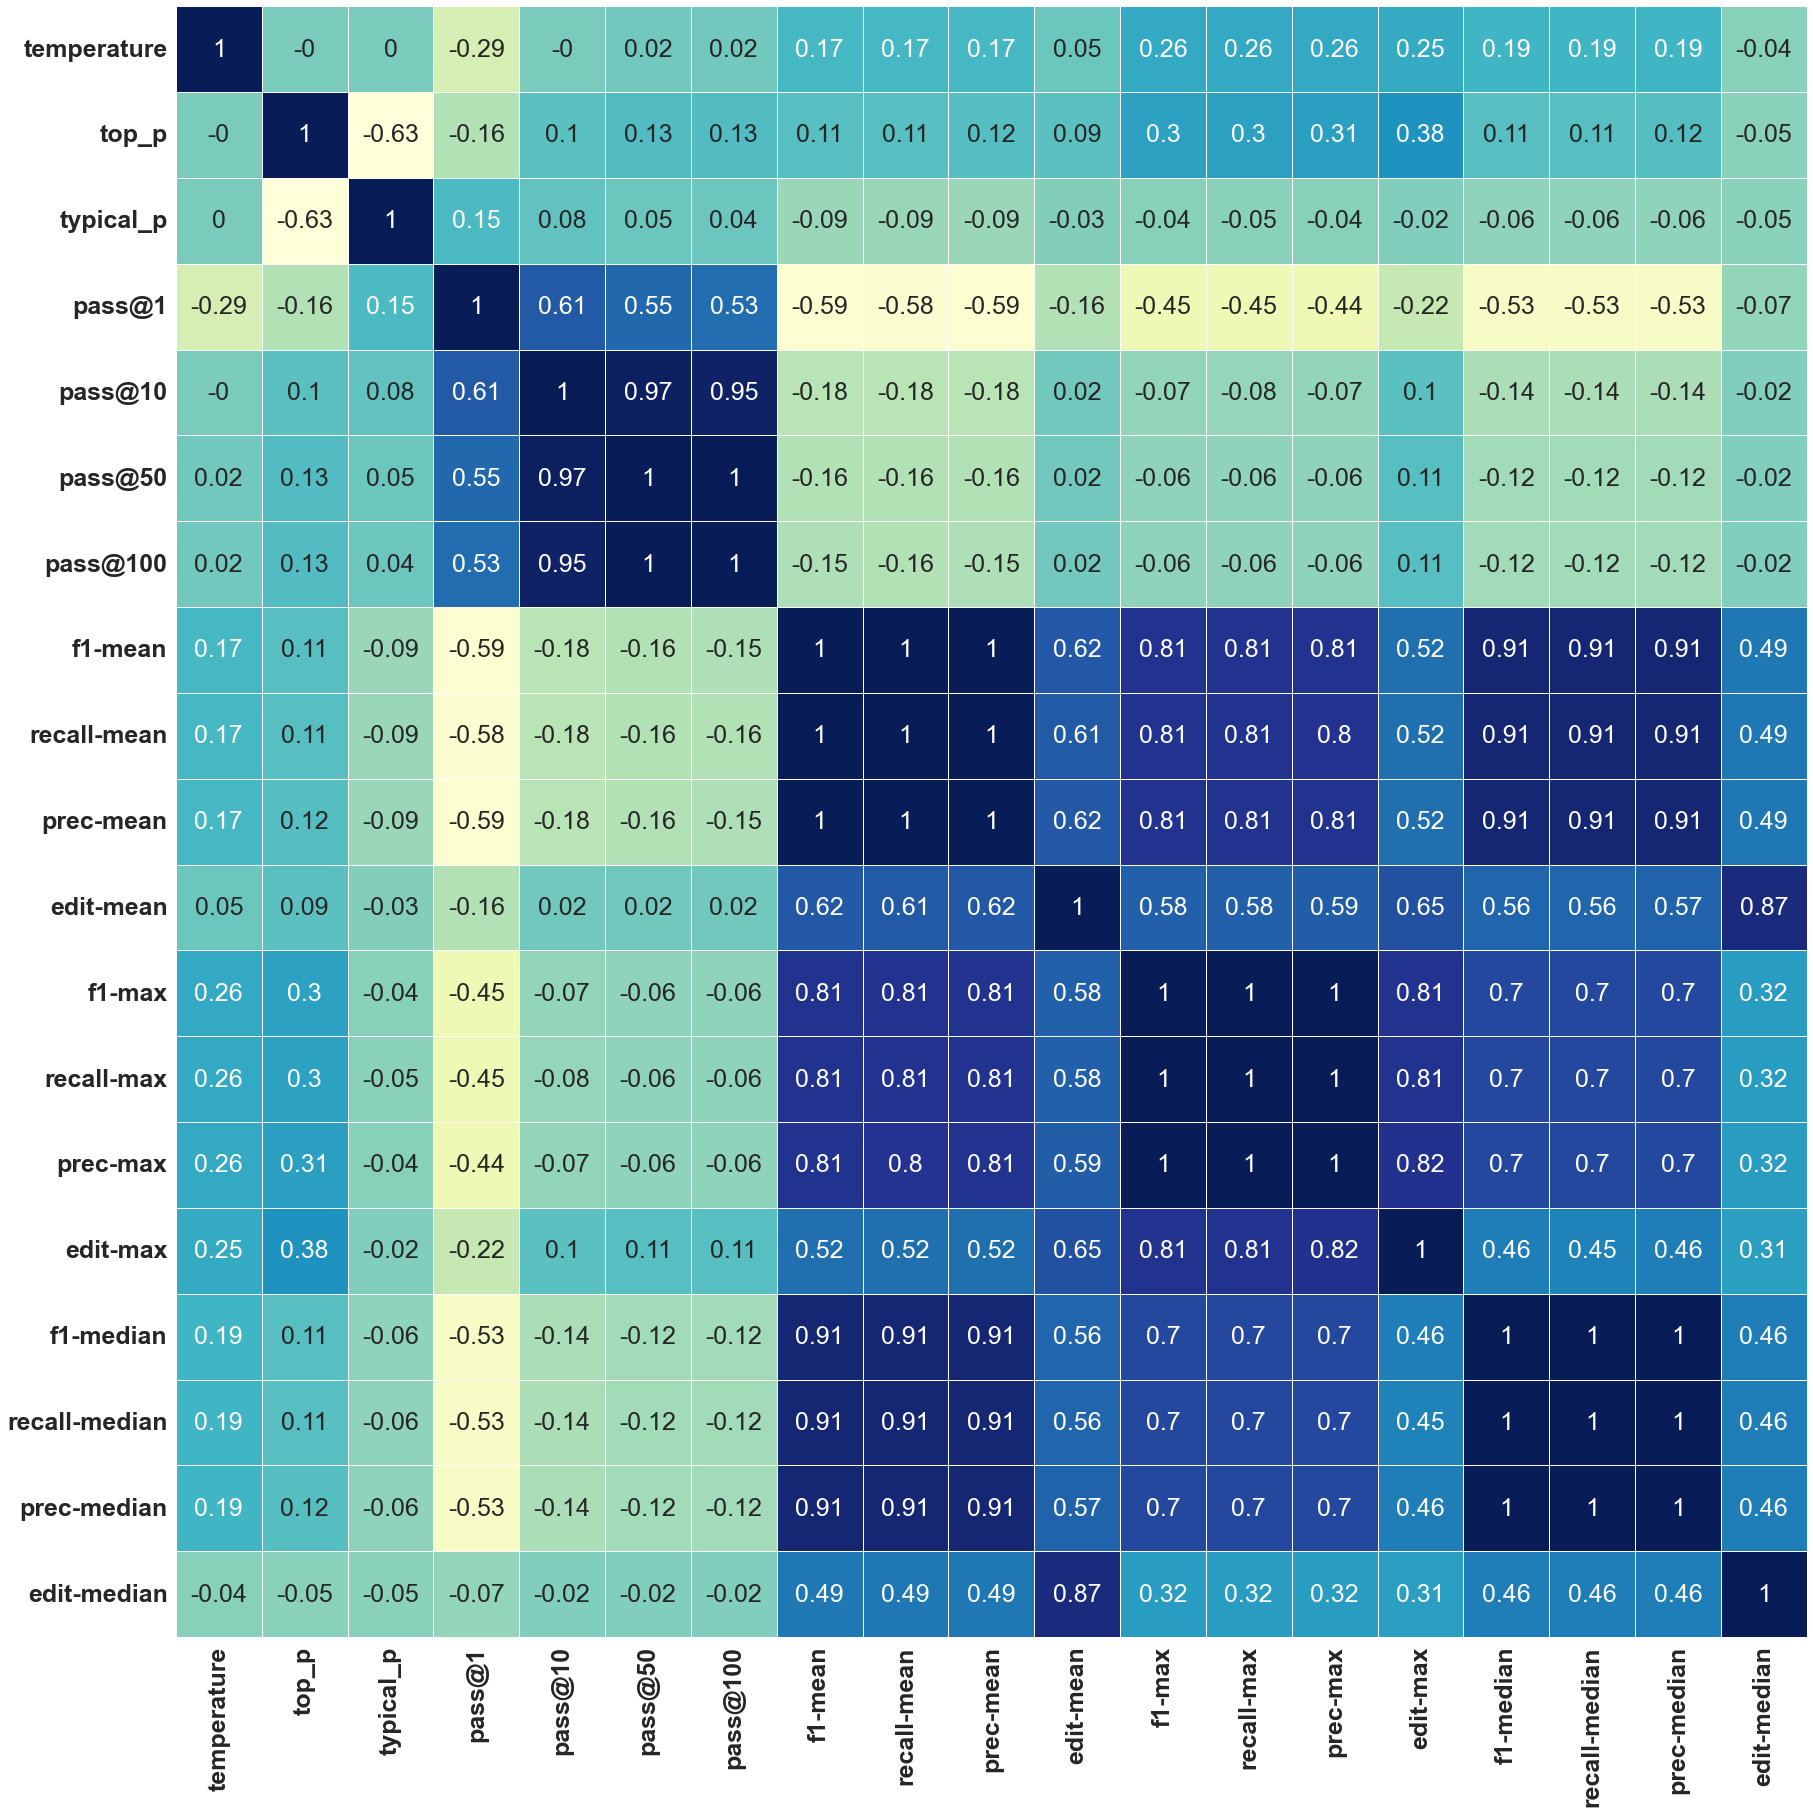

In [90]:
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(subset.corr().round(2), annot=True,  annot_kws={"size": 25}, cbar=False, linewidths=.5, square=True, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25, rotation=90, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25, rotation=0, fontweight='bold');

In [91]:
fig.savefig('corr.pdf', bbox_inches='tight', pad_inches=0, dpi=300)